## Review NumPy & Pandas

##### NumPy

1. Buatlah bilangan random dari fungsi `np.random.random()` 1 Dimensi (10000) elemen, lalu buat histogramnya dengan bins = 500. Apa yang bisa disimpulkan dari histogram tersebut?

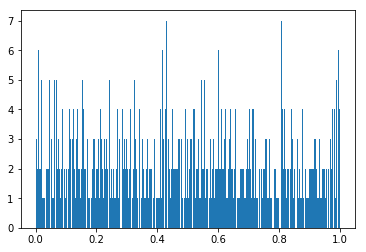

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

rand_int = np.random.random(size=1000)
plt.hist(rand_int, bins = 500);

2. Diberikan sebuah dadu, lalu dilemparkan sebanyak 1000 kali, buatlah array yang berisi hasil dari lemparan tersebut, lalu buatlah diagram batangnya ( `gunakan matplotlib.pyplot.bar` ). Apa yang bisa disimpulkan dari diagram batang tersebut?

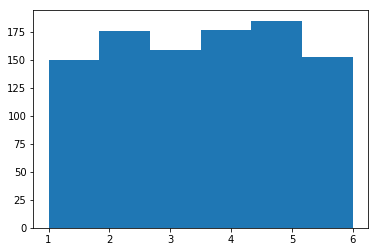

In [24]:
dadu = np.random.randint(1,7, size=1000);
dadu
plt.hist(dadu, bins = 6);

3. Andi melakukan eksperimen melempar sebuah dadu *30 kali*, setelah itu dihitung rata-rata nya. Eksperimen tersebut dilakukan berulang-ulang sampai *1000 kali*. Buatlah simulasinya dan buatlah histogram dari hasil rata-rata eksperimen tersebut (1 eksperimen adalah 30 kali pelemparan lalu dihitung rata-ratanya, sehingga di akhir eksperimen ada 1000 nilai rata-rata), apa yang bisa disimpulkan dari hasil eksperimen tersebut ?

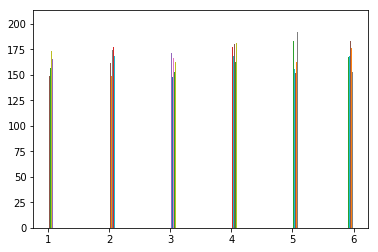

In [59]:
import pandas as pd

rng = np.random.RandomState(42)
dadu = pd.DataFrame(rng.randint(1,7, (30,1000)))
dadu#= #dadu.T[:1000]


rerata = pd.Series(dadu[i].mean() for i in range (1000))
plt.hist(dadu, bins=50);

#### Pandas

Bukalah file ```jumlah_guru_SD_jakarta.csv``` dan ```jumlah_sekolah_SD_jakarta.csv``` dan jawab pertanyaan berikut:

1. Berapakah jumlah guru SD negeri dan swasta dari masing-masing Kota Administratif ? Buat diagram batangnya!
2. Berapakah jumlah guru SD negeri dan swasta dari masing-masing Kota Administratif ? Buat diagram batangnya!
3. Gabung kedua data tersebut dan buat ```dataframe``` baru !
4. Hitunglah rata-rata jumlah guru setiap sekolah di setiap kecamatan !
5. Urutkan kecamatan yang memiliki rata-rata jumlah guru yang terbesar sampai yang terkecil !

In [53]:
%ls

jumlah_guru_SD_jakarta.csv     template-review.ipynb
jumlah_sekolah_sd_jakarta.csv  Untitled.ipynb


In [77]:
data_guru = pd.read_csv('jumlah_guru_SD_jakarta.csv', thousands=',')
sekolah = pd.read_csv('jumlah_sekolah_sd_jakarta.csv')

data_guru.groupby(['kabkota'])[['negeri','swasta']].sum()
sekolah.groupby(['kabkota'])[['negeri','swasta']].sum()

,negeri,swasta
kabkota,,
Jakarta Barat,456,222
Jakarta Pusat,276,104
Jakarta Selatan,521,154
Jakarta Timur,672,177
Jakarta Utara,269,182
Kepulauan Seribu,14,0


In [84]:
gabungan = pd.concat([data_guru, sekolah[['negeri', 'swasta']]], axis=1)
gabungan

gabungan['ratarataguru'] = (data_guru['negeri'] + data_guru['swasta']) / (sekolah['negeri'] + sekolah['swasta'])
gabungan.sort_values('ratarataguru', ascending=False)

,kabkota,kecamatan,negeri,swasta,negeri,swasta,ratarataguru
12,Jakarta Utara,Kelapa Gading,229,552,17,27,17.750000
33,Jakarta Timur,Ciracas,914,223,55,10,17.492308
24,Jakarta Selatan,Cilandak,652,527,46,23,17.086957
14,Jakarta Barat,Kembangan,813,614,57,27,16.988095
25,Jakarta Selatan,Pesanggrahan,781,249,48,14,16.612903
43,Kepulauan Seribu,Kepulauan Seribu Utara,113,0,7,0,16.142857
32,Jakarta Timur,Pasar Rebo,825,239,59,8,15.880597
22,Jakarta Selatan,Jagakarsa,966,343,62,21,15.771084
8,Jakarta Utara,Penjaringan,485,657,39,34,15.643836
21,Jakarta Barat,Kalideres,980,683,73,36,15.256881
